# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1339.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           9.52e-45
Time:                        00:35:34   Log-Likelihood:                 8.1173
No. Observations:                  50   AIC:                            -8.235
Df Residuals:                      46   BIC:                           -0.5865
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7913      0.073     65.545      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.22534303  4.74588002  5.22384775  5.6299749   5.94555402  6.1655151
  6.29925858  6.36911086  6.40665613  6.44754722  6.52564789  6.66746914
  6.88781354  7.18734315  7.55247082  7.95759247  8.36929379  8.75184012
  9.07304751  9.30957052  9.45073777  9.50030521  9.47583904  9.40582966
  9.32501072  9.26865254  9.26676724  9.33917788  9.49226157  9.71790172
  9.99482157 10.29207995 10.57415474 10.80677914 10.96257156 11.02553433
 10.99368211 10.87936806 10.70725423 10.51025969 10.32415198 10.18167065
 10.1071482  10.11251236 10.19532636 10.3391893  10.5164308  10.69265711
 10.83240195 10.9049535 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.87268711 10.69801788 10.40200873 10.03265938  9.65315435  9.3263932
  9.09959048  8.99271603  8.99360559  9.06093909]


## Plot comparison

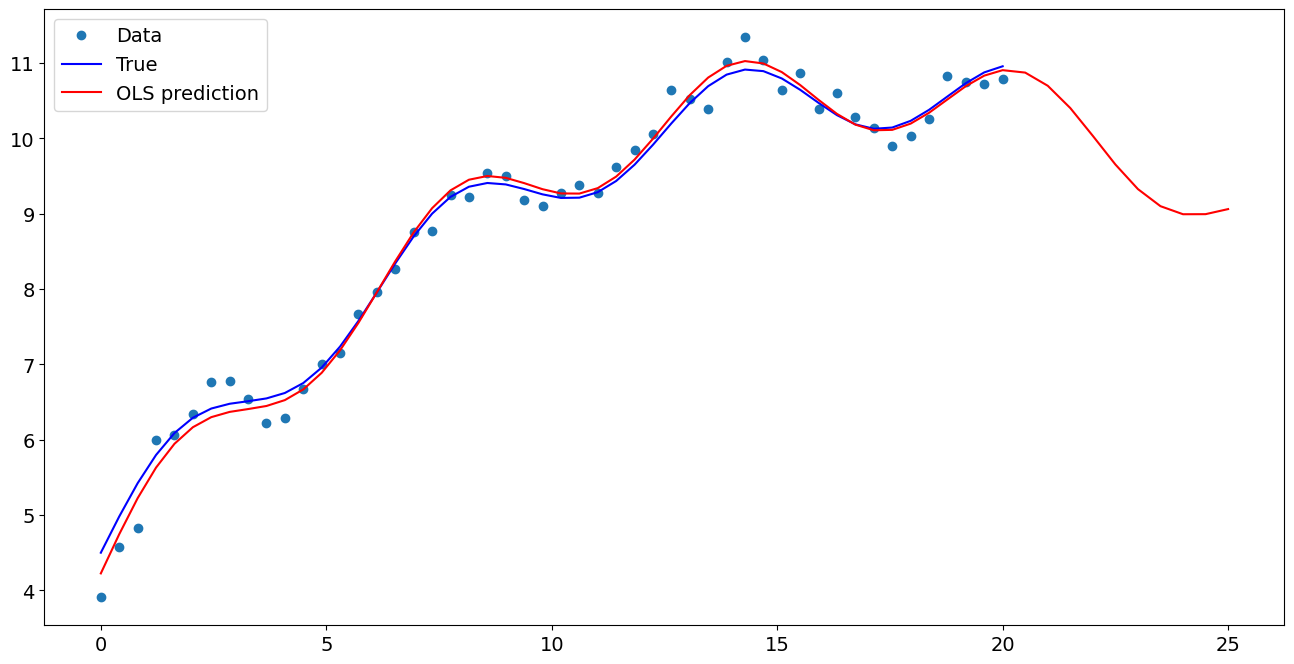

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.791324
x1                  0.535856
np.sin(x1)          0.537097
I((x1 - 5) ** 2)   -0.022639
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.872687
1    10.698018
2    10.402009
3    10.032659
4     9.653154
5     9.326393
6     9.099590
7     8.992716
8     8.993606
9     9.060939
dtype: float64